In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import sent_tokenize
nltk.download("punkt")
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to /Users/dev/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /Users/dev/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [2]:
clickbait_df = pd.read_csv("merged_all_datasets.csv")
clickbait_df.head()

,title,clickbait,set,char_capital,char_small,char_special,blank,numerical,letters,outlier
0,Should I Get Bings,1,1,4,11,0,3,0,15,0
1,Which TV Female Friend Group Do You Belong In,1,1,10,27,0,8,0,37,0
2,"The New ""Star Wars: The Force Awakens"" Trailer...",1,1,14,43,3,13,0,57,0
3,"This Vine Of New York On ""Celebrity Big Brothe...",1,1,12,42,2,11,0,54,0
4,A Couple Did A Stunning Photo Shoot With Their...,1,1,18,65,0,17,0,83,0


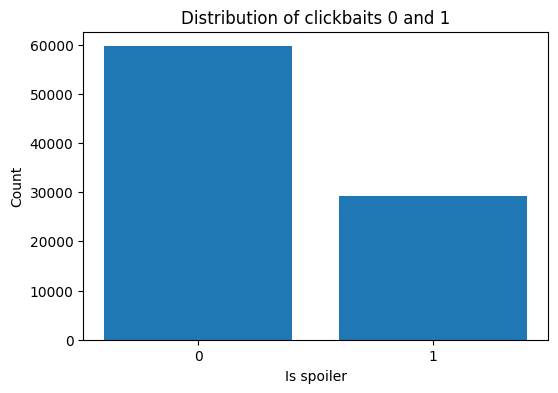

In [3]:
counts = clickbait_df["clickbait"].value_counts().sort_index()

# Plot
plt.figure(figsize=(6,4))
plt.bar(counts.index.astype(str), counts.values)
plt.xlabel("Is spoiler")
plt.ylabel("Count")
plt.title("Distribution of clickbaits 0 and 1")
plt.show()

=== Class Balance ===
clickbait
0    59655
1    29150
Name: count, dtype: int64

Class Balance (%):
clickbait
0    67.175272
1    32.824728
Name: proportion, dtype: float64

=== Missing & Empty Data ===
Missing text entries: 0
Empty text entries: 0

=== Duplicates ===
Number of duplicate text entries: 16406
        text_length    word_count  sentence_count
count  88805.000000  88805.000000    88805.000000
mean      61.932324     10.232352        1.038624
std       17.298720      3.008815        0.201887
min       12.000000      1.000000        1.000000
25%       50.000000      8.000000        1.000000
50%       61.000000     10.000000        1.000000
75%       73.000000     12.000000        1.000000
max      124.000000     25.000000        5.000000


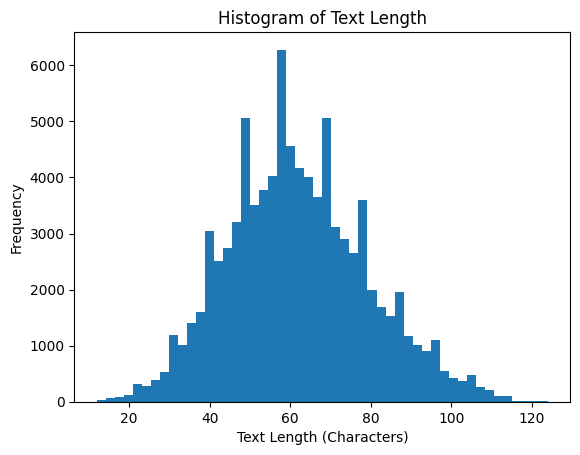

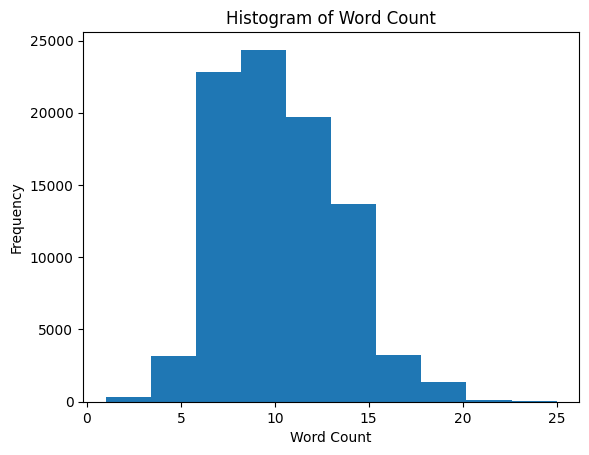

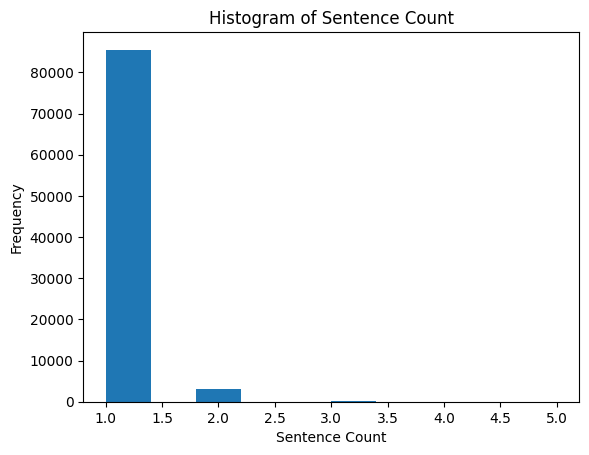

In [12]:
# Class balance
print("=== Class Balance ===")
print(clickbait_df['clickbait'].value_counts())
print("\nClass Balance (%):")
print(clickbait_df['clickbait'].value_counts(normalize=True) * 100)

# Missing/empty data
print("\n=== Missing & Empty Data ===")
missing_text = clickbait_df['title'].isna().sum()
empty_text = (clickbait_df['title'].astype(str).str.strip() == "").sum()
print(f"Missing text entries: {missing_text}")
print(f"Empty text entries: {empty_text}")


# Duplicates
print("\n=== Duplicates ===")
duplicate_count = clickbait_df.duplicated(subset=['title']).sum()
print(f"Number of duplicate text entries: {duplicate_count}")

# Compute counts
clickbait_df["text_length"] = clickbait_df['title'].apply(len)
clickbait_df['word_count'] = clickbait_df['title'].astype(str).apply(lambda x: len(x.split()))
clickbait_df['sentence_count'] = clickbait_df['title'].astype(str).apply(lambda x: len(sent_tokenize(x)))

print(clickbait_df[['text_length', 'word_count', 'sentence_count']].describe())

# Hist: Text Length (characters)
plt.figure()
plt.hist(clickbait_df["text_length"], bins=50)
plt.xlabel("Text Length (Characters)")
plt.ylabel("Frequency")
plt.title("Histogram of Text Length")
plt.show()

# Histogram: Word Count
plt.figure()
plt.hist(clickbait_df['word_count'].dropna())
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.title("Histogram of Word Count")
plt.show()

# Histogram: Sentence Count
plt.figure()
plt.hist(clickbait_df['sentence_count'].dropna())
plt.xlabel("Sentence Count")
plt.ylabel("Frequency")
plt.title("Histogram of Sentence Count")
plt.show()

